<a href="https://colab.research.google.com/github/KauaHenSilva/python_predict_MNIST/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [11]:
!pip install tensorflow==2.16.1 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.16.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.16.1 which is incompatible.


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
tf.__version__

'2.16.1'

In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as kr_utils

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

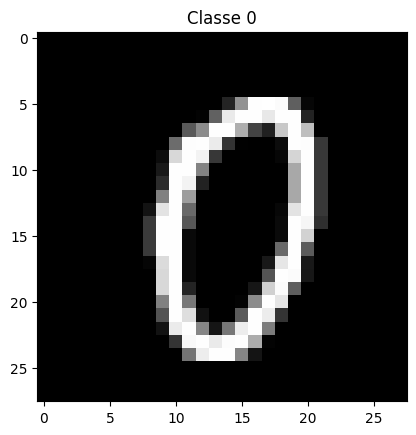

In [33]:
plt.imshow(x_train[1000], cmap='gray')
plt.title('Classe ' + str(y_train[1000]));

In [46]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
(x_train.shape, X_train.shape), (x_test.shape, X_test.shape)

(((60000, 28, 28), (60000, 28, 28, 1)), ((10000, 28, 28), (10000, 28, 28, 1)))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [48]:
X_train /= 255
X_test /= 255
(X_train.max(), X_test.max()),( X_train.min(), X_test.min())

((1.0, 1.0), (0.0, 0.0))

In [49]:
y_train = kr_utils.to_categorical(y_train, 10)
y_test = kr_utils.to_categorical(y_test, 10)

In [55]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape=(28,28,1)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(units=10, activation='softmax'))

In [56]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [57]:
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
rede_neural.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.8526 - loss: 0.4712 - val_accuracy: 0.9703 - val_loss: 0.1176
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9783 - loss: 0.0718 - val_accuracy: 0.9888 - val_loss: 0.0361
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9877 - val_loss: 0.0386
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9889 - loss: 0.0378 - val_accuracy: 0.9895 - val_loss: 0.0349
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.9889 - val_loss: 0.0395
